# Loops & Orbits &mdash; Homework &mdash; Battery Charging

To the user, the battery appears to be a single component, but to an electrical engineer, it needs to
be modeled as at least two components:

* One component that resists charging or discharging regardless of how full the battery is. This will be called r_zero in our code below.
* A second component, that depends on how full the battery is. This will be a function open_circuit_voltage(z). z is 0.0 when the battery is discharged. z is 1.0 when the battery is full (has charge Q).
* Q is measured in mAh (milli-amp hours) for most consumer electronics batteries.

First, grab all of the imports. **Just execute the imports.** There is nothing here for you to change.

In [1]:
# Use the numpy library for dealing with arrays of floats:
import numpy as np

# The following import statement makes the plotting library available to us. There is also a mysterious
# statement to work around a known Jupyter bug: https://github.com/jupyter/notebook/issues/3670
%matplotlib inline
import matplotlib.pyplot as plt

# Use unit testing framework to test each function we write:
import unittest

Next, define all the constants. **Just execute these assignments.** There is nothing here for you to change.

In [5]:
# Constants are from Figure 4(b) of Ruifeng Zhang, Bizhong Xia, Baohua Li, Libo Cao, Yongzhi Lai,
# Weiwei Zheng, Huawen Wang, Wei Wang, and Mingwang Wang,
# "Study on the Open Circuit Voltage and State of Charge Characterization of High Capacity Lithium-Ion Battery
# Under Different Temperature",
# published in [Energies 2018, Volume 11, Issue 9, p 2408](https://www.mdpi.com/1996-1073/11/9/2408)

# At 25 degrees Centigrade
a1 = 3.679
b1 = -0.1101
a2 = -0.2528
b2 = -6.829
c = 0.9386

# open-circuit voltage model -- S is the charge state -- S = 0 is empty -- S = 1 is full
def Voc(S):
    v = a1 * np.exp(b1 * S) + a2 * np.exp(b2 * S) + c * S**2
    return v

# The following two parameters establish the simulation time step and its maximum total duration:
delta_t = 5.0                  # simulation time step in seconds
simulation_time_steps = 3600   # 5 hours worth for a delta_t of 5.0

# The charger voltage
V = 4.2 ## This is a high enough charger voltage to eventually get the battery very close to 100% full

# Battery capacity
Q = 3100.0 # capacity in mAh -- a nice phone battery
# Convert battery capacity to Coulombs
q = Q * 3600.0 / 1000.0  # that's right folks, with Q = 3100, that's going to be 11,160 Coulombs!

# The battery's internal resistance
R0 = 0.025 # internal resistance in Ohms

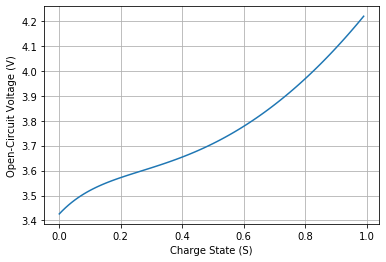

In [6]:
# Data for plotting
Ss = np.arange(0.0, 1.0, 0.01)
Vs = Voc(Ss)

fig, ax = plt.subplots()
ax.plot(Ss, Vs)

ax.set(xlabel='Charge State (S)', ylabel='Open-Circuit Voltage (V)')
ax.grid()

fig.savefig("test.png")
plt.show()

## The While Loop That Does the Work

**There is nothing for you to change below. You can just execute it once you've got your functions implemented.**

In [6]:
# Initialize the charge state
Ss = np.zeros((simulation_time_steps,))

# Initialize the times
times = np.zeros((simulation_time_steps,))

Ss[0] = 0.2 # Start with battery 20% full

# The 0th elements of Ss and times are already filled in.
# Start the loop with i = 1
i = 1
while i < simulation_time_steps:
    #
    # get all the before values
    #
    # charge state
    before_S = Ss[i - 1]
    # time
    before_time = times[i - 1]
    #
    # get the Voc for this change state
    #
    v = Voc(before_S)
    #
    # get the charging rate
    #
    rate_in_milliamps = V - v / R0
    
    after_velocity = before_velocity + delta_t * acceleration
    # update the position
    after_position = before_position + delta_t * after_velocity
    # update time
    after_time = before_time + delta_t
    #
    # assign the after values into their lists
    #
    velocities[i] = after_velocity
    positions[i] = after_position
    times[i] = after_time
    i = i + 1

## Graph

**Execute this to make a graph that looks a little like [the diagram Newton made](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Newton%27s_Principia_%281846%29.djvu/page519-1024px-Newton%27s_Principia_%281846%29.djvu.jpg).**

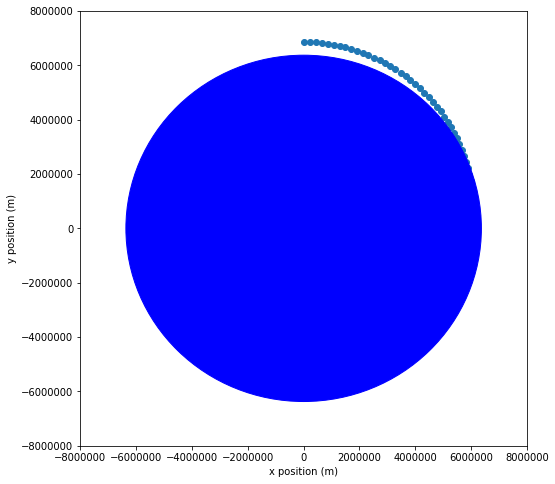

In [7]:

plt.figure(figsize=(8, 8))

x_positions = positions[:, 0]
y_positions = positions[:, 1]
plt.scatter(x_positions, y_positions)

plt.xlabel("x position (m)")
plt.ylabel("y position (m)")

# Some gibberish that draws a big blue circle representing the Earth:
earth = plt.Circle((0, 0), radius_of_earth, color='b')
plt.gcf().gca().add_artist(earth)

# Make the plot big enough to show the entire Earth:
plot_limit = 8000000
plt.xlim(-plot_limit, plot_limit)
plt.ylim(-plot_limit, plot_limit)

plt.show()

## Playing with the Simulation and Checkout Questions

Look at arc VF in [the diagram Newton made](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Newton%27s_Principia_%281846%29.djvu/page519-1024px-Newton%27s_Principia_%281846%29.djvu.jpg). For that arc the cannonball goes about 20% of the way around the Earth.

Play with `initial_speed` in the initialization cell. Each time you change it, re-execute the entire notebook.

A good range of values to try is 3000 to 8000 m/s. What makes an arc that is most like Newton's arc VF?

Show me or Ben that you can set a breakpoint in your `strength_of_gravity` function and inspect what is happening.